# 0. Load Data

## 0.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## 0.2 Define Dataset

In [2]:
data_paths = os.listdir(path='/kaggle/input/rape-cases-in-india-by-statecity')

# Removing files that are not part of the 2001–2011 range
data_paths.remove('NCRB_CII-2019_Table_3A.11.csv')
data_paths.remove('Table_5.3-2015.csv')

# Sorting the filenames to ensure chronological order
data_paths.sort()

In [3]:
# Reading the first CSV file (for the year 2001)
df = pd.read_csv(f'/kaggle/input/rape-cases-in-india-by-statecity/{data_paths[0]}')

# Saving the column names for reference
columns = df.columns

# Extracting the year from the filename
year = int(data_paths[0].split('_')[1])

# Adding a 'Year' column to the dataframe
df['Year'] = [year] * df.shape[0]

In [4]:
# Looping through the remaining files and merging them into one DataFrame
for data_path in data_paths[1:]:
    data = pd.read_csv(f'/kaggle/input/rape-cases-in-india-by-statecity/{data_path}')
    
    # Extract the year from the filename
    year = int((data_path.split('_')[1]).split('-')[0])
    
    # Drop 'Sr. No.' column for 2006 as it's not consistent with other files
    if year == 2006:
        data.drop('Sr. No.', axis=1, inplace=True)
    
    # Rename columns to match the initial DataFrame
    data.columns = columns
    
    # Add the 'Year' column
    data['Year'] = [year] * data.shape[0]
    
    # Concatenate with the main DataFrame
    df = pd.concat([df, data])

# Resetting index and converting Year to string for plotting
df.reset_index(drop=True, inplace=True)
df['Year'] = df['Year'].astype(str)

In [5]:
df.head()

,Category,States/UTs/Cities,No. of Cases Reported (Incest Rape Cases),No. of Victims (Incest Rape Cases) upto 10 Years,No. of Victims (Incest Rape Cases) - 10 - 14 Years,No. of Victims (Incest Rape Cases) - 14 - 18 Years,No. of Victims (Incest Rape Cases) - 18 - 30 Years,No. of Victims (Incest Rape Cases) - 30 - 50 Years,No. of Victims (Incest Rape Cases) above 50 Years,No. of Victims (Incest Rape Cases) - Total Victims,...,No. of Victims (Other Rape Cases) - Total Victims,No. of Cases Reported (Total Rape Cases),No. of Victims (Total Rape Cases) upto 10 Years,No. of Victims (Total Rape Cases) - 10-14 Years,No. of Victims (Total Rape Cases) - 14 - 18 Years,No. of Victims (Total Rape Cases) - 18 - 30 Years,No. of Victims (Total Rape Cases) - 30 - 50 Years,No. of Victims (Total Rape Cases) above 50 Years,No. of Victims (Total Rape Cases) - Total Victims,Year
0,State,Andhra Pradesh,4.0,0.0,2.0,0.0,2.0,0.0,0.0,4.0,...,867.0,871.0,57.0,138.0,254.0,328.0,80.0,14.0,871.0,2001
1,State,Arunachal Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,33.0,0.0,0.0,1.0,28.0,4.0,0.0,33.0,2001
2,State,Assam,8.0,0.0,1.0,7.0,0.0,0.0,0.0,8.0,...,809.0,817.0,8.0,73.0,245.0,370.0,119.0,2.0,817.0,2001
3,State,Bihar,8.0,0.0,2.0,5.0,1.0,0.0,0.0,8.0,...,880.0,888.0,1.0,15.0,198.0,562.0,112.0,0.0,888.0,2001
4,State,Chhattisgarh,6.0,0.0,3.0,1.0,1.0,1.0,0.0,6.0,...,953.0,959.0,25.0,191.0,218.0,384.0,137.0,4.0,959.0,2001


# 1.Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Category                                            684 non-null    object 
 1   States/UTs/Cities                                   684 non-null    object 
 2   No. of Cases Reported (Incest Rape Cases)           681 non-null    float64
 3   No. of Victims (Incest Rape Cases) upto 10 Years    681 non-null    float64
 4   No. of Victims (Incest Rape Cases) - 10 - 14 Years  681 non-null    float64
 5   No. of Victims (Incest Rape Cases) - 14 - 18 Years  681 non-null    float64
 6   No. of Victims (Incest Rape Cases) - 18 - 30 Years  681 non-null    float64
 7   No. of Victims (Incest Rape Cases) - 30 - 50 Years  681 non-null    float64
 8   No. of Victims (Incest Rape Cases) above 50 Years   681 non-null    float64
 9  

## 1.1 Find if Null Values are present

In [7]:
df.isnull().sum()

Category                                              0
States/UTs/Cities                                     0
No. of Cases Reported (Incest Rape Cases)             3
No. of Victims (Incest Rape Cases) upto 10 Years      3
No. of Victims (Incest Rape Cases) - 10 - 14 Years    3
No. of Victims (Incest Rape Cases) - 14 - 18 Years    3
No. of Victims (Incest Rape Cases) - 18 - 30 Years    3
No. of Victims (Incest Rape Cases) - 30 - 50 Years    3
No. of Victims (Incest Rape Cases) above 50 Years     3
No. of Victims (Incest Rape Cases) - Total Victims    3
No. of Cases Reported (Other Rape Cases)              3
No. of Victims (Other Rape Cases) upto 10 Years       3
No. of Victims (Other Rape Cases) - 10 - 14 Years     3
No. of Victims (Other Rape Cases) - 14 - 18 Years     3
No. of Victims (Other Rape Cases) - 18 - 30 Years     3
No. of Victims (Other Rape Cases) - 30 - 50 Years     3
No. of Victims (Other Rape Cases) above 50 Years      3
No. of Victims (Other Rape Cases) - Total Victim

## 1.2 Check Naming Consistency

### Check for 'States/UTs/Cities' values

In [8]:
df['States/UTs/Cities'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Orissa', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal', 'Total (States)', 'A & N Islands', 'Chandigarh',
       'D & N Haveli', 'Daman & Diu', 'Delhi', 'Lakshadweep',
       'Pondicherry', 'Total (UTs)', 'Total (All-India)', 'Agra',
       'Ahmedabad', 'Allahabad', 'Amritsar', 'Asansol', 'Bangalore',
       'Bhopal', 'Chennai', 'Coimbatore', 'Delhi (City)', 'Dhanbad',
       'Faridabad', 'Hyderabad', 'Indore', 'Jabalpur', 'Jaipur',
       'Jamshedpur', 'Kanpur', 'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana',
       'Madurai', 'Meerut', 'Mumbai', 'Nagpur', 'Nasik', 'Patna', 'Pune',
       'Rajkot', 'Surat', 'Vadodara', 'Varanasi', '

### Check for Category values

In [9]:
df['Category'].unique()

array(['State', 'Union Territory', 'Total (All-India)', 'City',
       'Total (Cities)', 'All India', 'Union Territories'], dtype=object)

# 2.Data Cleaning

## 2.1 Drop Rows where Null Values are present

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

Category                                              0
States/UTs/Cities                                     0
No. of Cases Reported (Incest Rape Cases)             0
No. of Victims (Incest Rape Cases) upto 10 Years      0
No. of Victims (Incest Rape Cases) - 10 - 14 Years    0
No. of Victims (Incest Rape Cases) - 14 - 18 Years    0
No. of Victims (Incest Rape Cases) - 18 - 30 Years    0
No. of Victims (Incest Rape Cases) - 30 - 50 Years    0
No. of Victims (Incest Rape Cases) above 50 Years     0
No. of Victims (Incest Rape Cases) - Total Victims    0
No. of Cases Reported (Other Rape Cases)              0
No. of Victims (Other Rape Cases) upto 10 Years       0
No. of Victims (Other Rape Cases) - 10 - 14 Years     0
No. of Victims (Other Rape Cases) - 14 - 18 Years     0
No. of Victims (Other Rape Cases) - 18 - 30 Years     0
No. of Victims (Other Rape Cases) - 30 - 50 Years     0
No. of Victims (Other Rape Cases) above 50 Years      0
No. of Victims (Other Rape Cases) - Total Victim

## 2.1 Clean Category Column

In [12]:
#Standard name is 'Union Territory' some rows contain 'Union Territories'
# replace such values with standard name
df['Category']=df['Category'].str.replace('Union Territories','Union Territory')

In [13]:
# Drop rows where 'Category' contains aggregate values like 'Total (All-India)', 
# 'Total (Cities)', or 'All India' as they are not required for individual-level analysis.
# These totals can be calculated separately during analysis if needed.
df=df[~df['Category'].isin(['Total (All-India)','Total (Cities)', 'All India'])]

In [14]:
df['Category'].unique()

array(['State', 'Union Territory', 'City'], dtype=object)

## 2.2 Clean 'States/UTs/Cities' Column

In [15]:
# Mapping of non-standard or outdated region names to their standardized forms 
# for consistency and uniformity across datasets.
standard_names={
    'A & N Islands':'Andaman and Nicobar Islands',
    'D & N Haveli':'Dadra and Nagar Haveli',
    'Chandigarh(c)':'Chandigarh',
    'Delhi (CITY)':'Delhi',
    'Delhi (city)': 'Delhi',
    'Delhi (City)': 'Delhi',
    'Orissa':'Odisha',
    'Puducherry': 'Pondicherry',
    'Uttaranchal':'Uttarakhand'
}
df['States/UTs/Cities'] = df['States/UTs/Cities'].replace(standard_names)

In [16]:
# Removing aggregate rows (totals for States, UTs, Cities, and All-India)
# to retain only individual region-level data for analysis.
df=df[~df['States/UTs/Cities'].isin([
    'Total (States)',
    'Total (UTs)',
    'Total (All-India)',
    'Total (Cities)',
    'Total (All India)'])]

In [17]:
df['States/UTs/Cities'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Andaman and Nicobar Islands', 'Chandigarh',
       'Dadra and Nagar Haveli', 'Daman & Diu', 'Delhi', 'Lakshadweep',
       'Pondicherry', 'Agra', 'Ahmedabad', 'Allahabad', 'Amritsar',
       'Bangalore', 'Bhopal', 'Chennai', 'Coimbatore', 'Faridabad',
       'Hyderabad', 'Indore', 'Jabalpur', 'Jaipur', 'Kanpur', 'Kochi',
       'Kolkata', 'Lucknow', 'Ludhiana', 'Madurai', 'Meerut', 'Mumbai',
       'Nagpur', 'Nasik', 'Patna', 'Pune', 'Rajkot', 'Surat', 'Vadodara',
       'Varanasi', 'Vijayawada', 'Vishakhapatnam', 'Asansol', 'Dhanbad',
       'Jamshedpur', 'Bengaluru', 'A

# 3.Data Analysis

In [18]:
#defining color palette which will be used in analysis
palette = ['#fde2e4', '#fbc4ab', '#f8ad9d', '#f4978e', '#f08080', '#d86f60']

## 3.1 Total number of rape cases reported each year across India

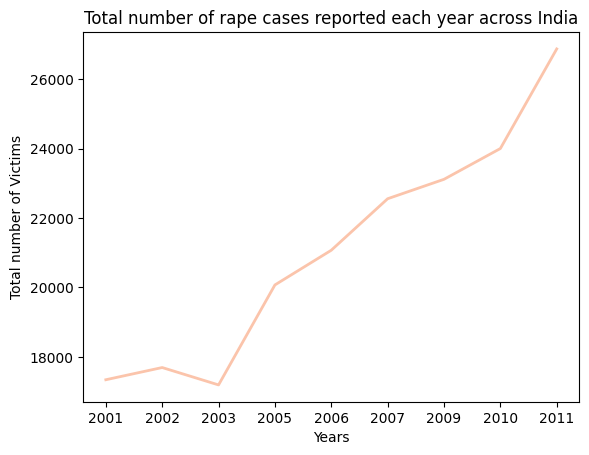

In [19]:
cases_per_year=df.groupby('Year')['No. of Victims (Total Rape Cases) - Total Victims'].sum()
y=df['Year']
plt.plot(cases_per_year.index,cases_per_year.values,color=palette[1],linewidth=2)
plt.xlabel('Years')
plt.ylabel('Total number of Victims')
plt.title('Total number of rape cases reported each year across India')
plt.show()

## 3.2 States or UTs reported the highest number of total rape cases

In [20]:
df[df['No. of Victims (Total Rape Cases) - Total Victims']==
df['No. of Victims (Total Rape Cases) - Total Victims'].max()][['Category','States/UTs/Cities','No. of Victims (Total Rape Cases) - Total Victims','Year']]

,Category,States/UTs/Cities,No. of Victims (Total Rape Cases) - Total Victims,Year
605,State,Madhya Pradesh,3408.0,2011


## 3.3 States or UTs reported the lowest number of total rape cases

In [21]:
df[df['No. of Victims (Total Rape Cases) - Total Victims']
==df['No. of Victims (Total Rape Cases) - Total Victims'].min()][['Category','States/UTs/Cities','No. of Victims (Total Rape Cases) - Total Victims','Year']]

,Category,States/UTs/Cities,No. of Victims (Total Rape Cases) - Total Victims,Year
32,Union Territory,Daman & Diu,0.0,2001
34,Union Territory,Lakshadweep,0.0,2001
106,Union Territory,Daman & Diu,0.0,2002
256,Union Territory,Lakshadweep,0.0,2005
330,Union Territory,Lakshadweep,0.0,2006
552,Union Territory,Lakshadweep,0.0,2010
626,Union Territory,Lakshadweep,0.0,2011


## 3.4 Distribution of victims by age group for a specific year 

<Axes: xlabel='Year'>

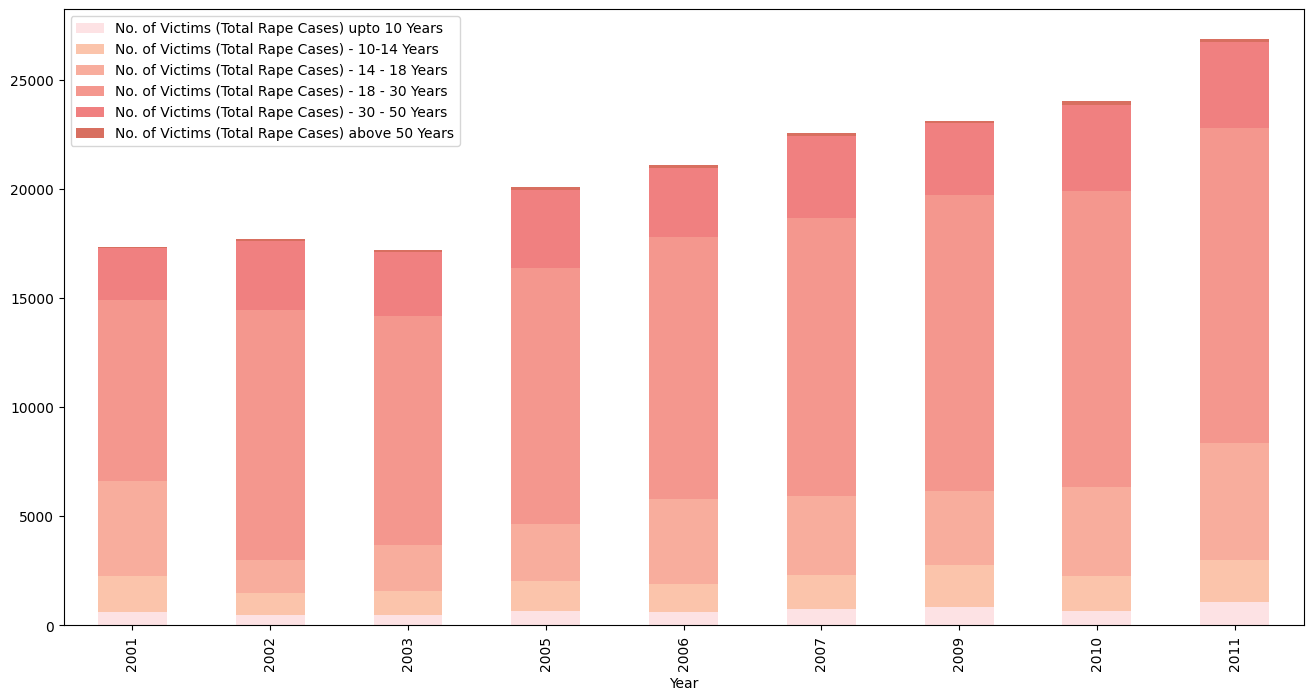

In [22]:
age_groups = [
    "No. of Victims (Total Rape Cases) upto 10 Years",
    "No. of Victims (Total Rape Cases) - 10-14 Years",
    "No. of Victims (Total Rape Cases) - 14 - 18 Years",
    "No. of Victims (Total Rape Cases) - 18 - 30 Years",
    "No. of Victims (Total Rape Cases) - 30 - 50 Years",
    "No. of Victims (Total Rape Cases) above 50 Years"
]
cases=df.groupby('Year')[age_groups].sum()
cases.plot(kind='bar',stacked=True,color=palette,figsize=(16, 8))

## 3.5 The number of Incest vs. Other rape cases across all states

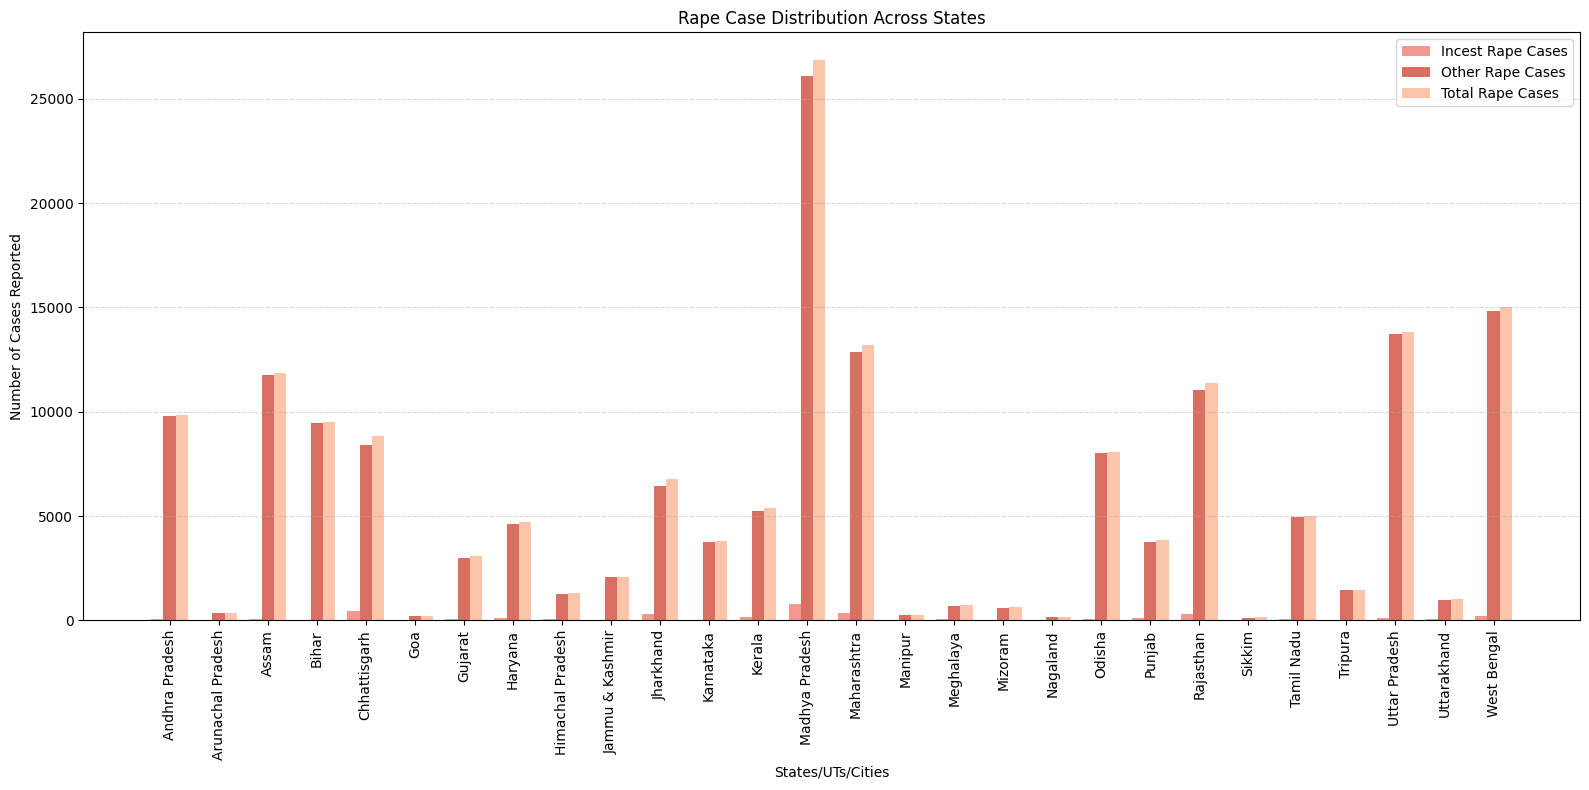

In [23]:
number_of_incest_rape_cases = df[df['Category'] == 'State'].groupby('States/UTs/Cities')['No. of Cases Reported (Incest Rape Cases)'].sum()
number_of_other_rape_cases = df[df['Category'] == 'State'].groupby('States/UTs/Cities')['No. of Cases Reported (Other Rape Cases)'].sum()
number_of_total_rape_cases = df[df['Category'] == 'State'].groupby('States/UTs/Cities')['No. of Cases Reported (Total Rape Cases)'].sum()

states=number_of_incest_rape_cases.index
x=np.arange(len(states))

width=0.25

plt.figure(figsize=(16,8))

plt.bar(x - width, number_of_incest_rape_cases.values, width=width, label='Incest Rape Cases', color='#f4978e')
plt.bar(x, number_of_other_rape_cases.values, width=width, label='Other Rape Cases', color='#d86f60')
plt.bar(x + width, number_of_total_rape_cases.values, width=width, label='Total Rape Cases', color='#fbc4ab')

plt.xticks(x,states, rotation=90)
plt.xlabel('States/UTs/Cities')
plt.ylabel('Number of Cases Reported')
plt.title('Rape Case Distribution Across States')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


## 3.6 The top 5 states with the highest total number of underage victims (upto 10, 10–14, 14–18 years).

<Axes: xlabel='States/UTs/Cities'>

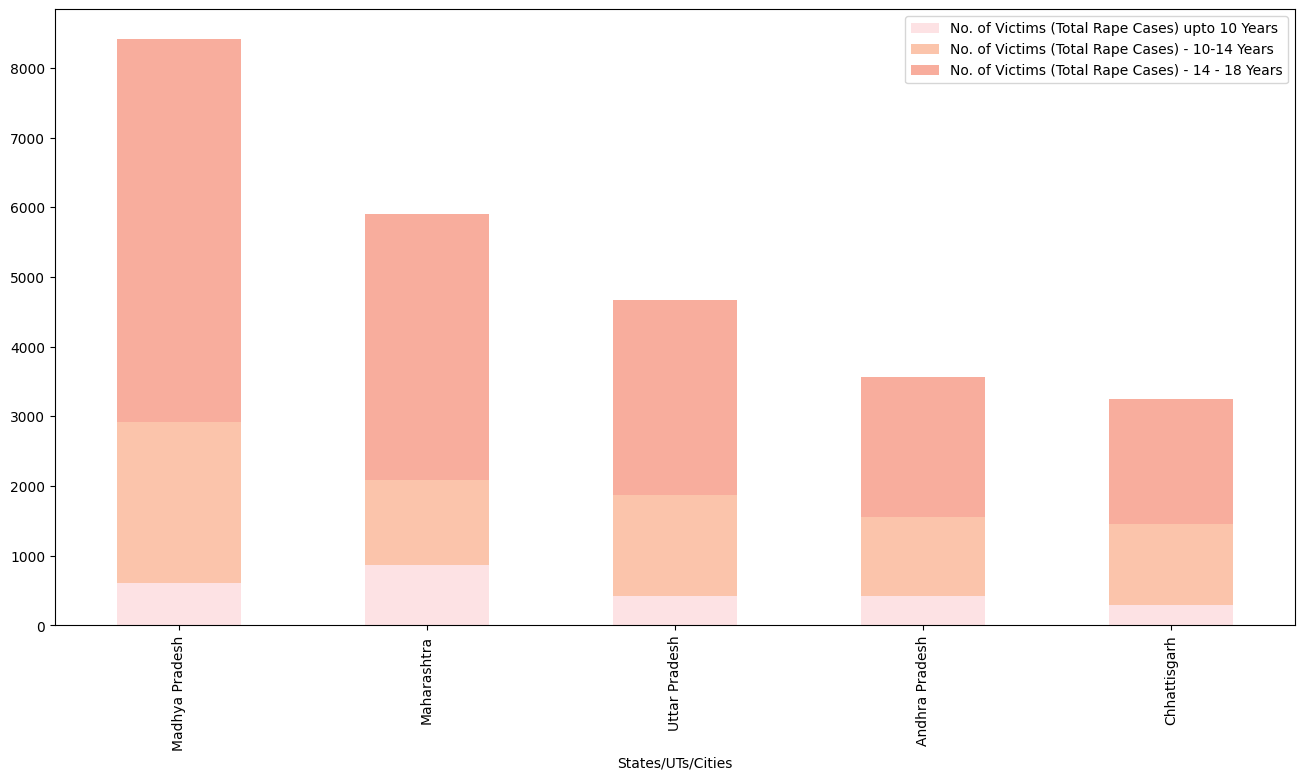

In [24]:
underage_groups=[
    'No. of Victims (Total Rape Cases) upto 10 Years',
    'No. of Victims (Total Rape Cases) - 10-14 Years',
    'No. of Victims (Total Rape Cases) - 14 - 18 Years'
]
states_with_underage_victims=df[df['Category']=='State'].groupby('States/UTs/Cities')[underage_groups].sum()
states_with_underage_victims['Total']=states_with_underage_victims.sum(axis=1)
top_5_states=states_with_underage_victims.sort_values(by='Total',ascending=False).head()
top_5_states=top_5_states.drop(columns='Total')
top_5_states.plot(kind='bar',stacked=True,color=palette,figsize=(16,8))

## 3.7 Total Number of Rape Cases over the years in urban areas, states and union territories

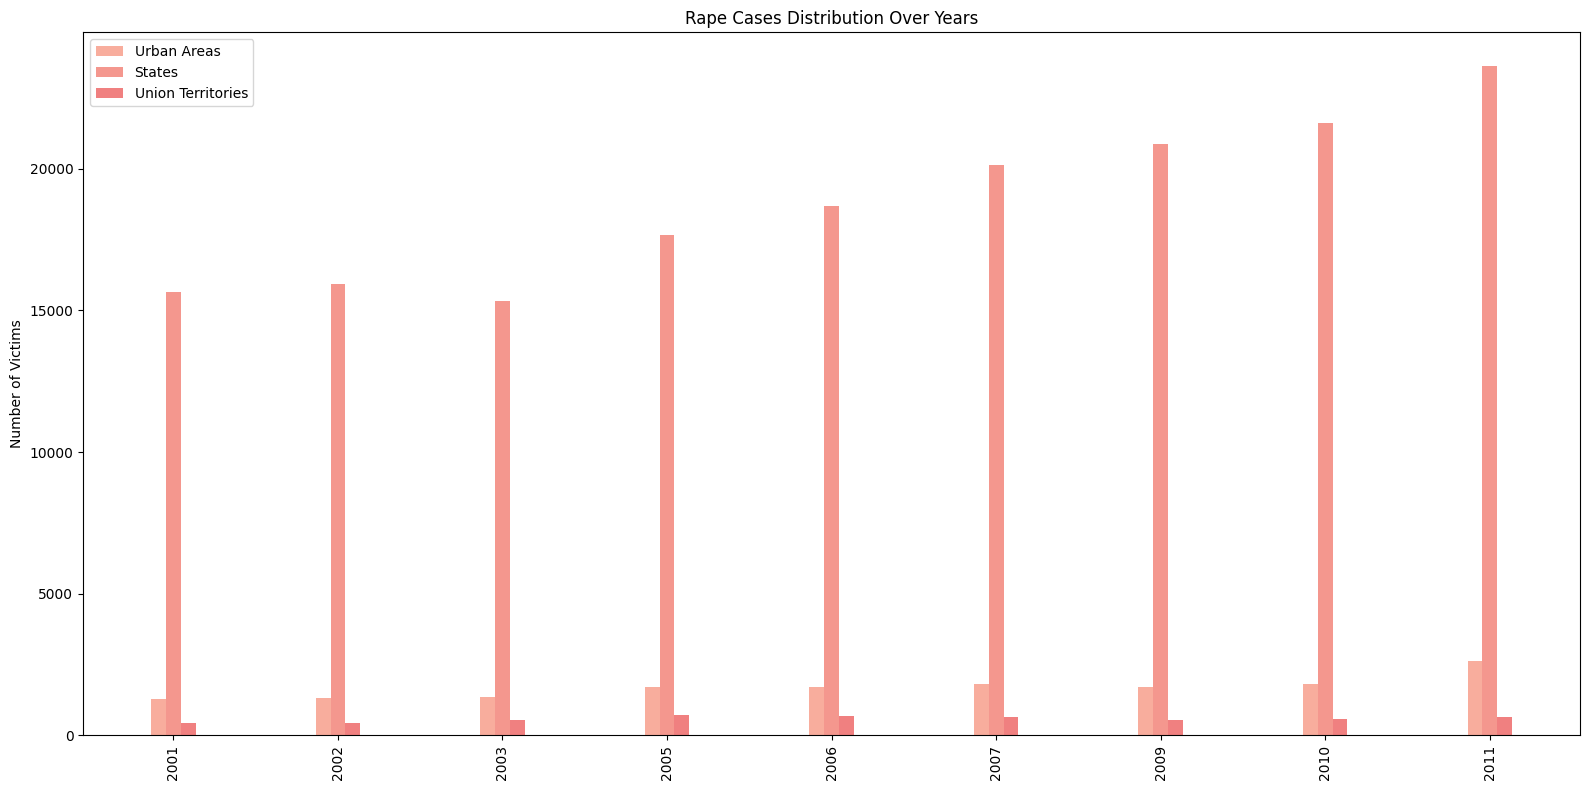

In [25]:
import numpy as np
import matplotlib.pyplot as plt

cases_in_urban_areas=df[df['Category'] == 'City'].groupby('Year')['No. of Victims (Total Rape Cases) - Total Victims'].sum()
cases_in_states=df[df['Category'] == 'State'].groupby('Year')['No. of Victims (Total Rape Cases) - Total Victims'].sum()
cases_in_union_territory=df[df['Category'] == 'Union Territory'].groupby('Year')['No. of Victims (Total Rape Cases) - Total Victims'].sum()
years = cases_in_urban_areas.index

x=np.arange(len(years))
width=0.09


plt.figure(figsize=(16, 8))

plt.bar(x - width, cases_in_urban_areas.values, width=width, color=palette[2], label='Urban Areas')
plt.bar(x, cases_in_states.values, width=width, color=palette[3], label='States')
plt.bar(x + width, cases_in_union_territory.values, width=width, color=palette[4], label='Union Territories')

plt.xticks(x, years, rotation=90)
plt.ylabel('Number of Victims')
plt.title('Rape Cases Distribution Over Years')
plt.legend()
plt.tight_layout()
plt.show()
